# CASE STUDY ON SUPERVISED LEARNING


# Do the following in the iris dataset


In [3]:
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

SyntaxError: invalid syntax (<ipython-input-3-b4a5bca364bd>, line 1)

# READ THE DATA SET INTO PYTHON ENVIRONMENT

In [12]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,f1_score,confusion_matrix,precision_score,recall_score,accuracy_score

In [21]:
df=pd.read_excel('Downloads/casestudy7.xls')
df


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df.head()


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2.Do necessary pre-processing steps.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
df.shape

(150, 5)

In [25]:
df.tail()


,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Checking for missing values

In [29]:

df.isnull().sum() 


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# The given dataset contains 150 rows and 5 columns. There are null values in the dataset and the count of null values are as follows :
SL - 7, SW - 6, PL - 6

# 2. Do necessary pre-processing steps.

In [45]:
df.dtypes



SL                float64
SW                float64
PL                float64
PW                float64
Classification    float64
dtype: object

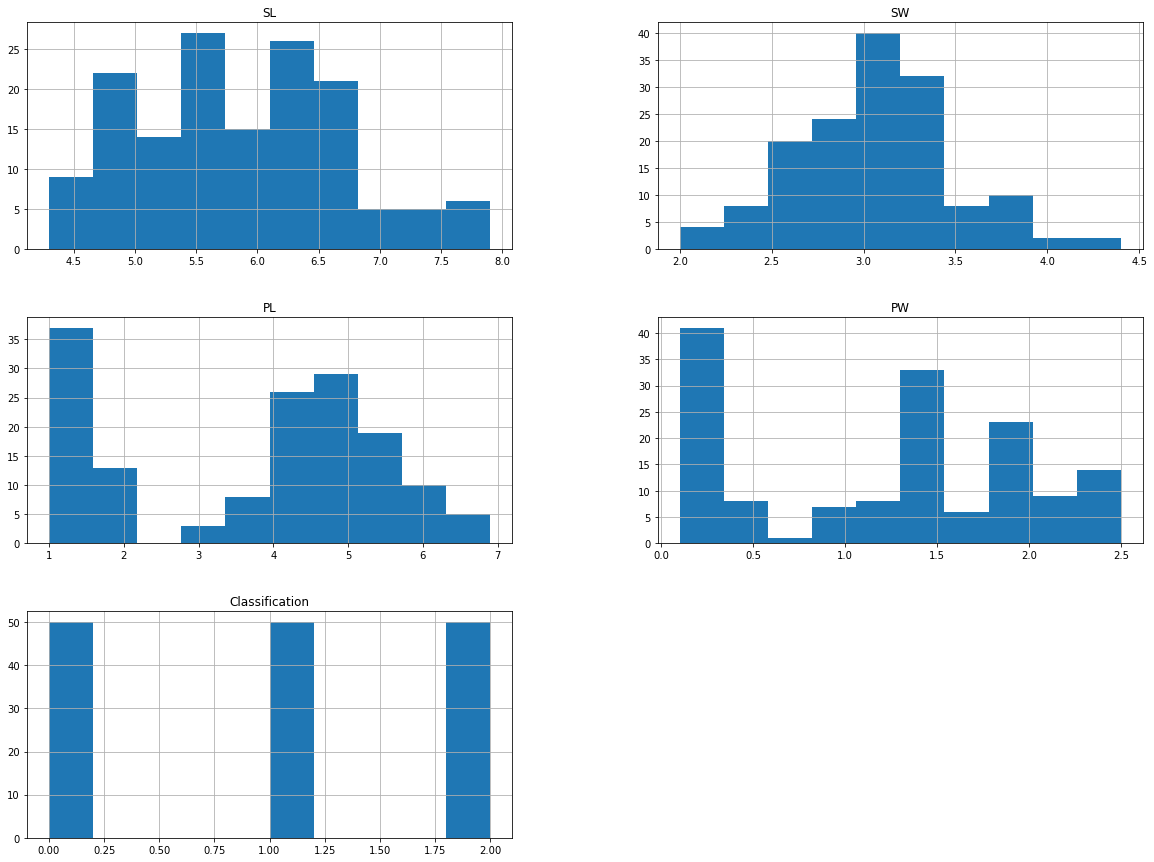

In [46]:
# plotting histogram to find skewness
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

i. Handling null values

In [48]:
df = df.fillna(df.median())
df.isna().sum()


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

ii. Converting the categorical variable (Classification) to numerical variable using Label Encoding.

In [50]:
df['Classification'].value_counts()

0.0    50
2.0    50
1.0    50
Name: Classification, dtype: int64

In [51]:
# Label encoding is used here
# One Hot Enocoding - won't work here as it would cause issues at the time of data splitting.

from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a = ['Classification']
for i in np.arange(len(a)):
     df[a[i]] = label_en.fit_transform(df[a[i]])

In [53]:
df.head()


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.3,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [55]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification      int64
dtype: object

Text(0.5, 1.0, 'Box plot of SL')

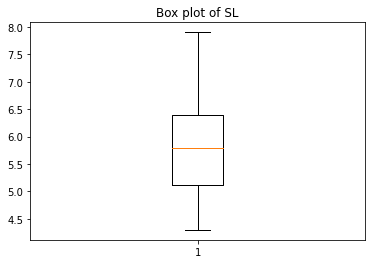

In [56]:

plt.boxplot(df['SL'])
plt.title('Box plot of SL')

Text(0.5, 1.0, 'Box plot of SW')

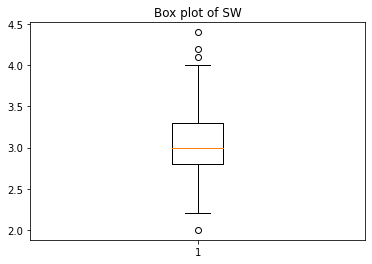

In [59]:
# plotting boxplot to check for outliers

plt.boxplot(df['SW'])
plt.title('Box plot of SW')

In [60]:
# Finding IQR (Q3-Q1)

# The data points that fall below Q1-1.5*IQR and the data points that fall above Q3+1.5*IQR are generally considered as outliers.

Q1 = np.percentile(df['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(df['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(df['SW'], 75, interpolation='midpoint')


2.8
3.0
3.3


In [63]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [61]:
# Q2 = median

df['SW'].median()



3.0

In [62]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('Lower limit is : ', low_lim)
print('Upper limit is : ', up_lim)

Lower limit is :  2.05
Upper limit is :  4.05


In [64]:
Insights:
We can remove all the values that are above 4.05 and below 2.05. To do this, we will create a loop as follows.

SyntaxError: invalid syntax (<ipython-input-64-b5f75d1799a3>, line 1)

In [65]:
outlier = []
for x in df['SW']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[4.4, 4.1, 4.2, 2.0]

In [66]:
ind1 = df['SW'] > up_lim
df.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [68]:

# To find the index of the outliers (low_lim)

ind1 = df['SW'] < low_lim
df.loc[ind1].index



Int64Index([60], dtype='int64')

In [82]:
# Dropping the outliers from the dataset (up_lim)

df.drop([15, 32, 33], inplace=True)


KeyError: '[15 32 33] not found in axis'

In [75]:

df.shape


(145, 5)

Text(0.5, 1.0, 'Box plot of SW')

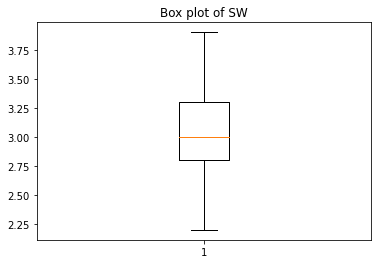

In [76]:
# Plot boxplot to see whether the outliers are reduced

plt.boxplot(df['SW'])
plt.title('Box plot of SW')

In [78]:
The outliers have reduced.


SyntaxError: invalid syntax (<ipython-input-78-8b80b0a621f0>, line 1)

c) checking the column 'PL'

Text(0.5, 1.0, 'Box plot of PL')

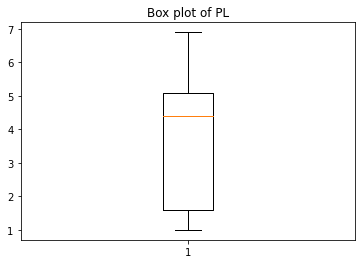

In [83]:
# plotting boxplot to check for outliers

plt.boxplot(df['PL'])
plt.title('Box plot of PL')

Text(0.5, 1.0, 'Box plot of PW')

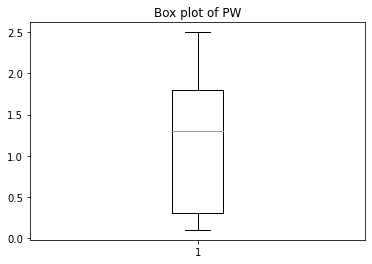

In [84]:
# plotting boxplot to check for outliers

plt.boxplot(df['PW'])
plt.title('Box plot of PW')

In [86]:
No ouliers in the column 'PW'.

SyntaxError: invalid syntax (<ipython-input-86-add870862738>, line 1)

<AxesSubplot:>

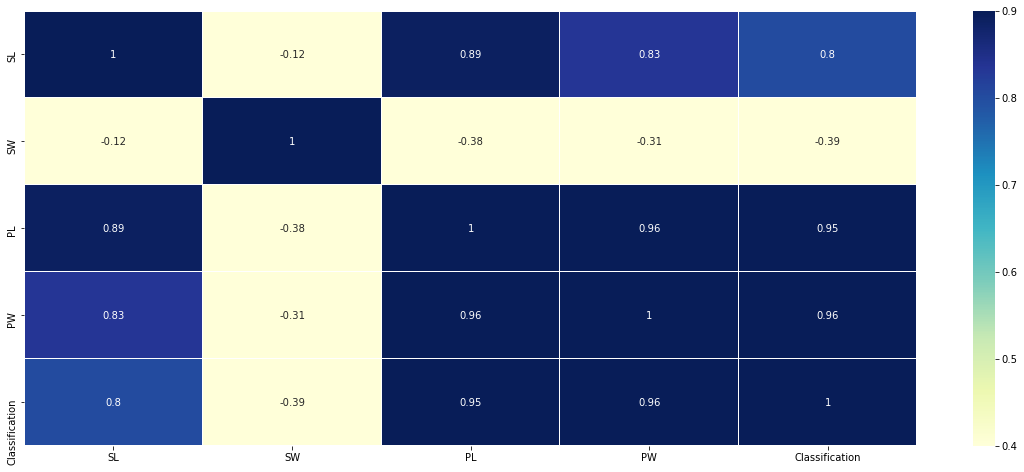

In [87]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [88]:
y = df['Classification']
x = df.drop('Classification', axis=1)
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.871379,3.028621,3.824828,1.226897
std,0.832494,0.383322,1.746168,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.500000,3.300000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [90]:
from sklearn import preprocessing
# Min-Max Scaling :

min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.436494,0.487424,0.478784,0.469540
std,0.231248,0.225483,0.295961,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.576271,0.500000
75%,0.611111,0.647059,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


# Insights :
As part of pre-processing, we have done the below.
1) Filled all the null values in the given datatset using the median value.
2) Converted the categorical variable ('Classification') to numerical variable using Label Encoding.
3) Checked for outliers and handled them.
4) Performed min-max scaling on the dataset to scale the values.

# 3. Find out which classification model gives the best result to predict iris species(also do random forest algorithm).

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Random Forest - general form (without tuning any hyperparameters)

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy on Random Forest model is : ', accuracy_score(y_test, y_pred))

Accuracy on Random Forest model is :  0.896551724137931


# Here, the accuracy of Random Forest model is 89.6%. And this value may change as the training and testing data changes.
It is a hillariuos task to manually try all the possible classification models. Hence, we are proceeding with the below to find the model that gives the best result.


In [93]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [94]:
model_params = {
    'SVM' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'Random_Forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'Logistic_Regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    }, 
    'Decision_Tree' : {
        'model' : DecisionTreeClassifier(random_state=42),
        'params' : {
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]
        }
    },
    'kNN' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
        }
    }
}

In [95]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
df1 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df1 = df1.style.set_properties(subset=['best_params'], **{'width-min': '300px'})
df1

,model,best_score,best_params
0,SVM,0.982971,"{'C': 10, 'kernel': 'rbf'}"
1,Random_Forest,0.974638,{'n_estimators': 10}
2,Logistic_Regression,0.931884,{'C': 10}
3,Decision_Tree,0.957246,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}"
4,kNN,0.991667,"{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}"


In [96]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [97]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [98]:
clf.best_score_

0.9916666666666668

In [99]:
clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}

# Insights :
From the above table, it can be concluded that the kNN model gives the best_score when compared to the other models. The best_score provided by kNN is 99.17%. Hence, the model is highly efficient.